In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")


from pydataset import data
import prepare
import wrangle_zillow
import wrangle_clustering
import env

from scipy import stats
import math

In [2]:
df = wrangle_zillow.get_zillow_df()

In [3]:
df.shape


(52442, 70)

In [4]:
df.columns.unique

<bound method Index.unique of Index(['parcelid', 'typeconstructiontypeid', 'storytypeid',
       'heatingorsystemtypeid', 'buildingclasstypeid',
       'architecturalstyletypeid', 'airconditioningtypeid',
       'propertylandusetypeid', 'id', 'basementsqft', 'bathroomcnt',
       'bedroomcnt', 'buildingqualitytypeid', 'calculatedbathnbr',
       'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'latitude',
       'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum',
       'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidneighborhood', 'regionidzip', 'roomcnt', 'threequarterbathnbr',
  

In [5]:
df_1 = df["id"]


In [6]:
cols = []
count = 1
for column in df.columns:
    if column == 'id':
        cols.append(f'property_id_{count}')
        count+=1
        continue
    cols.append(column)
df.columns = cols

In [7]:
df.columns.unique

<bound method Index.unique of Index(['parcelid', 'typeconstructiontypeid', 'storytypeid',
       'heatingorsystemtypeid', 'buildingclasstypeid',
       'architecturalstyletypeid', 'airconditioningtypeid',
       'propertylandusetypeid', 'property_id_1', 'basementsqft', 'bathroomcnt',
       'bedroomcnt', 'buildingqualitytypeid', 'calculatedbathnbr',
       'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'latitude',
       'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum',
       'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidneighborhood', 'regionidzip', 'roomcnt', 'threequarterb

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52442 entries, 0 to 52441
Data columns (total 70 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52442 non-null  int64  
 1   typeconstructiontypeid        76 non-null     float64
 2   storytypeid                   47 non-null     float64
 3   heatingorsystemtypeid         33936 non-null  float64
 4   buildingclasstypeid           0 non-null      float64
 5   architecturalstyletypeid      70 non-null     float64
 6   airconditioningtypeid         13638 non-null  float64
 7   propertylandusetypeid         52442 non-null  float64
 8   property_id_1                 52442 non-null  int64  
 9   basementsqft                  47 non-null     float64
 10  bathroomcnt                   52442 non-null  float64
 11  bedroomcnt                    52442 non-null  float64
 12  buildingqualitytypeid         33741 non-null  float64
 13  c

In [9]:
# this code line replaces the period on the columns with a space
import re
df.columns = [re.sub("[ ,-]", "_", re.sub("[\.,`,\$]", "", c)) for c in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52442 entries, 0 to 52441
Data columns (total 70 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52442 non-null  int64  
 1   typeconstructiontypeid        76 non-null     float64
 2   storytypeid                   47 non-null     float64
 3   heatingorsystemtypeid         33936 non-null  float64
 4   buildingclasstypeid           0 non-null      float64
 5   architecturalstyletypeid      70 non-null     float64
 6   airconditioningtypeid         13638 non-null  float64
 7   propertylandusetypeid         52442 non-null  float64
 8   property_id_1                 52442 non-null  int64  
 9   basementsqft                  47 non-null     float64
 10  bathroomcnt                   52442 non-null  float64
 11  bedroomcnt                    52442 non-null  float64
 12  buildingqualitytypeid         33741 non-null  float64
 13  c

In [10]:
def handle_nulls(df):
    pct_null = df.isnull().sum() / len(df)
    missing_features = pct_null[pct_null > 0.20].index
    df.drop(missing_features, axis=1, inplace=True)
    df.dropna(inplace= True)
    return df

In [11]:
df_20 = handle_nulls(df)
df_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50674 entries, 0 to 52441
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      50674 non-null  int64  
 1   propertylandusetypeid         50674 non-null  float64
 2   property_id_1                 50674 non-null  int64  
 3   bathroomcnt                   50674 non-null  float64
 4   bedroomcnt                    50674 non-null  float64
 5   calculatedbathnbr             50674 non-null  float64
 6   calculatedfinishedsquarefeet  50674 non-null  float64
 7   finishedsquarefeet12          50674 non-null  float64
 8   fips                          50674 non-null  float64
 9   fullbathcnt                   50674 non-null  float64
 10  latitude                      50674 non-null  float64
 11  longitude                     50674 non-null  float64
 12  lotsizesquarefeet             50674 non-null  float64
 13  p

In [23]:
df = df.drop(columns = ['property_id_1', 'assessmentyear','id1','transactiondate'])


KeyError: "['property_id_1' 'assessmentyear' 'id1' 'transactiondate'] not found in axis"

In [24]:
df.columns

Index(['parcelid', 'propertylandusetypeid', 'bathroomcnt', 'bedroomcnt',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fips', 'fullbathcnt', 'latitude', 'longitude',
       'lotsizesquarefeet', 'propertycountylandusecode',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidzip', 'roomcnt', 'yearbuilt', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount',
       'censustractandblock', 'max_transactiondate', 'logerror',
       'propertylandusedesc'],
      dtype='object')

In [25]:
df.fips.value_counts()


6037.0    32822
6059.0    13522
6111.0     4330
Name: fips, dtype: int64

In [26]:
for column in df.columns:
    print(column)
    print(df[column].value_counts())
    print("-----------------")
    

parcelid
13083743    3
10722858    2
12519794    2
14092694    2
10811539    2
           ..
10720574    1
12483845    1
13077156    1
17230690    1
12826780    1
Name: parcelid, Length: 50560, dtype: int64
-----------------
propertylandusetypeid
261.0    50674
Name: propertylandusetypeid, dtype: int64
-----------------
bathroomcnt
2.0     21539
3.0     10154
1.0      9239
2.5      3862
4.0      2067
3.5       883
1.5       817
5.0       738
4.5       657
6.0       282
5.5       219
7.0        85
8.0        49
6.5        44
7.5        16
9.0        12
10.0        5
11.0        3
8.5         2
13.0        1
Name: bathroomcnt, dtype: int64
-----------------
bedroomcnt
3.0     22846
4.0     14714
2.0      8058
5.0      3758
6.0       603
1.0       534
7.0       100
0.0        27
8.0        23
9.0         8
10.0        2
11.0        1
Name: bedroomcnt, dtype: int64
-----------------
calculatedbathnbr
2.0     21539
3.0     10154
1.0      9239
2.5      3862
4.0      2067
3.5       883
1.5   

In [27]:
df["fips"] = pd.Categorical(df.fips) #converted fips data to categorical and changed the names to county names for readability purposes
df['fips'] = df['fips'].astype(str).apply(lambda x: x.replace('.0',''))

In [30]:
df["fips"].replace("6111",'Ventura', inplace=True)#converted fips data to county names 
df["fips"].replace("6059",'Orange', inplace=True)
df["fips"].replace("6037",'Los_Angeles', inplace=True)

In [31]:
df = df[df.calculatedfinishedsquarefeet <= 6000] #removed outliers by cutting houses over 60000 sqfeet, below 70feet
df = df[df.calculatedfinishedsquarefeet>70] #removes outliers below 70 sqfeet
df = df[df.taxvaluedollarcnt<=1_200_000]#removed houses over 1.2 million in dollar amount to remove outliers
df = df[df.bedroomcnt <=6]# removed houses above 6 bedrooms/
df = df[df.bathroomcnt <=6] # and 6baths  in order to have a normal distribution
df = df[df.logerror <= 2]
df = df[df.logerror>= -2]
# df.drop(["property_id_1", "assessmentyear","id1","transactiondate"])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46838 entries, 0 to 52441
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      46838 non-null  int64  
 1   propertylandusetypeid         46838 non-null  float64
 2   bathroomcnt                   46838 non-null  float64
 3   bedroomcnt                    46838 non-null  float64
 4   calculatedbathnbr             46838 non-null  float64
 5   calculatedfinishedsquarefeet  46838 non-null  float64
 6   finishedsquarefeet12          46838 non-null  float64
 7   fips                          46838 non-null  object 
 8   fullbathcnt                   46838 non-null  float64
 9   latitude                      46838 non-null  float64
 10  longitude                     46838 non-null  float64
 11  lotsizesquarefeet             46838 non-null  float64
 12  propertycountylandusecode     46838 non-null  object 
 13  r

In [33]:
df.columns.values.tolist()

['parcelid',
 'propertylandusetypeid',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedbathnbr',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'fips',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'propertycountylandusecode',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidzip',
 'roomcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'censustractandblock',
 'max_transactiondate',
 'logerror',
 'propertylandusedesc']

In [34]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
newdf

,parcelid,propertylandusetypeid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,...,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror
0,14297519,261.0,3.5,4.0,3.5,3100.0,3100.0,3.0,33634931.0,-117869207.0,...,1286.0,96978.0,0.0,1998.0,485713.0,1023282.0,537569.0,11013.72,6.059063e+13,0.025595
1,17052889,261.0,1.0,2.0,1.0,1465.0,1465.0,1.0,34449266.0,-119281531.0,...,2061.0,97099.0,5.0,1967.0,88000.0,464000.0,376000.0,5672.48,6.111001e+13,0.055619
2,14186244,261.0,2.0,3.0,2.0,1243.0,1243.0,2.0,33886168.0,-117823170.0,...,1286.0,97078.0,6.0,1962.0,85289.0,564778.0,479489.0,6488.30,6.059022e+13,0.005383
3,12177905,261.0,3.0,4.0,3.0,2376.0,2376.0,3.0,34245180.0,-118240722.0,...,3101.0,96330.0,0.0,1970.0,108918.0,145143.0,36225.0,1777.51,6.037300e+13,-0.103410
4,12095076,261.0,3.0,4.0,3.0,2962.0,2962.0,3.0,34145202.0,-118179824.0,...,3101.0,96293.0,0.0,1950.0,276684.0,773303.0,496619.0,9516.26,6.037461e+13,-0.001011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52437,11000655,261.0,2.0,2.0,2.0,1286.0,1286.0,2.0,34245368.0,-118282383.0,...,3101.0,96284.0,0.0,1940.0,70917.0,354621.0,283704.0,4478.43,6.037101e+13,0.020615
52438,17239384,261.0,2.0,4.0,2.0,1612.0,1612.0,2.0,34300140.0,-118706327.0,...,2061.0,97116.0,7.0,1964.0,50683.0,67205.0,16522.0,1107.48,6.111008e+13,0.013209
52439,12773139,261.0,1.0,3.0,1.0,1032.0,1032.0,1.0,34040895.0,-118038169.0,...,3101.0,96480.0,0.0,1954.0,32797.0,49546.0,16749.0,876.43,6.037434e+13,0.037129
52440,12826780,261.0,2.0,3.0,2.0,1762.0,1762.0,2.0,33937685.0,-117996709.0,...,3101.0,96171.0,0.0,1955.0,140000.0,522000.0,382000.0,6317.15,6.037503e+13,0.007204


In [35]:
def handle_outliers(df, cols, k):
    # Create placeholder dictionary for each columns bounds
    bounds_dict = {}

    # get a list of all columns that are not object type
    non_object_cols = df.dtypes[df.dtypes != 'object'].index


    for col in non_object_cols:
        # get necessary iqr values
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound =  q3 + k * iqr
        lower_bound =  q1 - k * iqr

        #store values in a dictionary referencable by the column name
        #and specific bound
        bounds_dict[col] = {}
        bounds_dict[col]['upper_bound'] = upper_bound
        bounds_dict[col]['lower_bound'] = lower_bound

    for col in non_object_cols:
        #retrieve bounds
        col_upper_bound = bounds_dict[col]['upper_bound']
        col_lower_bound = bounds_dict[col]['lower_bound']

        #remove rows with an outlier in that column
        df = df[(df[col] < col_upper_bound) & (df[col] > col_lower_bound)]
    
    return df

In [36]:
handle_outliers(df, df["logerror"], 1.5)

,parcelid,propertylandusetypeid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,max_transactiondate,logerror,propertylandusedesc


In [37]:
np.quantile

<function numpy.quantile(a, q, axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=False)>

In [38]:
train, validate, test = prepare.split_data(df)

array([[<AxesSubplot:title={'center':'parcelid'}>,
        <AxesSubplot:title={'center':'propertylandusetypeid'}>,
        <AxesSubplot:title={'center':'bathroomcnt'}>,
        <AxesSubplot:title={'center':'bedroomcnt'}>,
        <AxesSubplot:title={'center':'calculatedbathnbr'}>],
       [<AxesSubplot:title={'center':'calculatedfinishedsquarefeet'}>,
        <AxesSubplot:title={'center':'finishedsquarefeet12'}>,
        <AxesSubplot:title={'center':'fullbathcnt'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'lotsizesquarefeet'}>,
        <AxesSubplot:title={'center':'rawcensustractandblock'}>,
        <AxesSubplot:title={'center':'regionidcity'}>,
        <AxesSubplot:title={'center':'regionidcounty'}>,
        <AxesSubplot:title={'center':'regionidzip'}>],
       [<AxesSubplot:title={'center':'roomcnt'}>,
        <AxesSubplot:title={'center':'yearbuilt'}>,
        <AxesSubplot:title={'ce

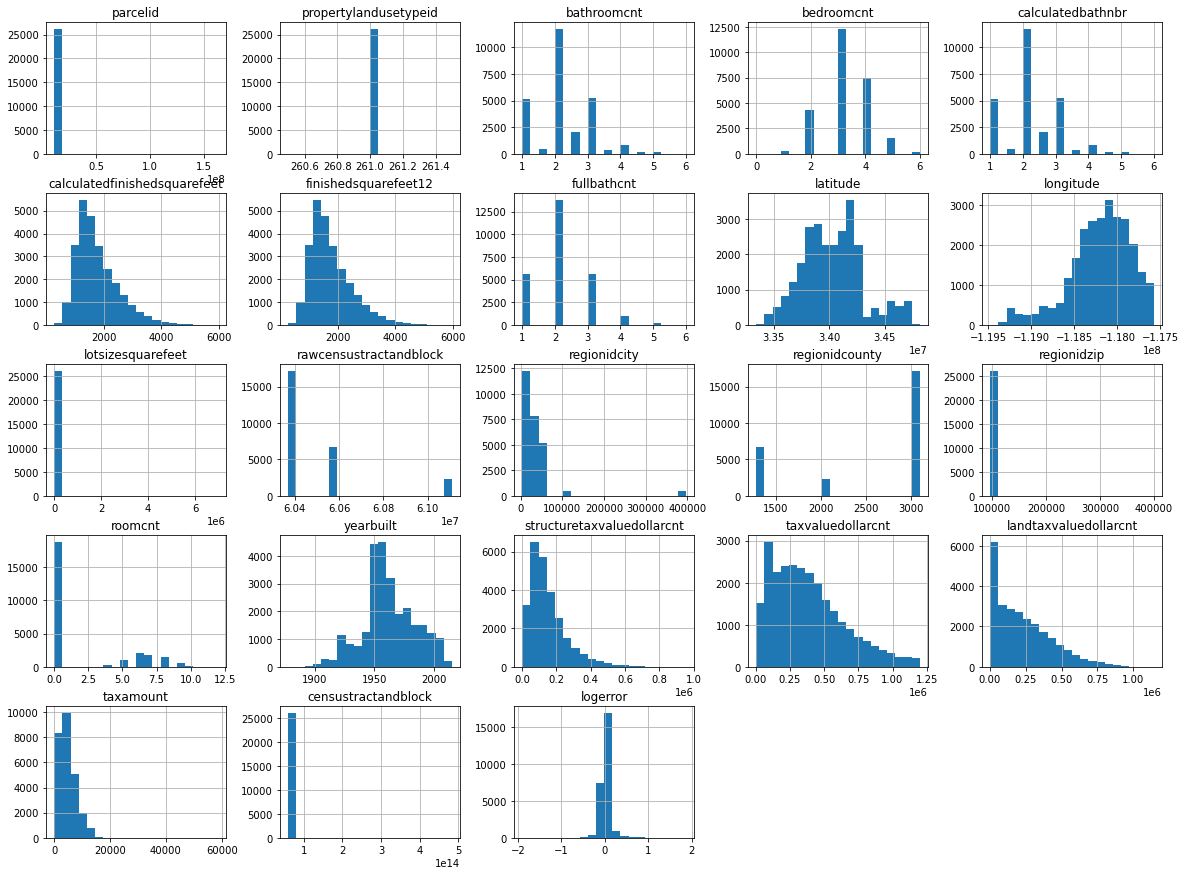

In [39]:
train.hist(bins = 20,figsize =  (20,15))


In [40]:
df.logerror

0        0.025595
1        0.055619
2        0.005383
3       -0.103410
4       -0.001011
           ...   
52437    0.020615
52438    0.013209
52439    0.037129
52440    0.007204
52441   -0.197755
Name: logerror, Length: 46838, dtype: float64

No handles with labels found to put in legend.


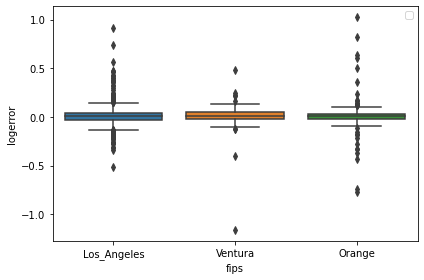

No handles with labels found to put in legend.


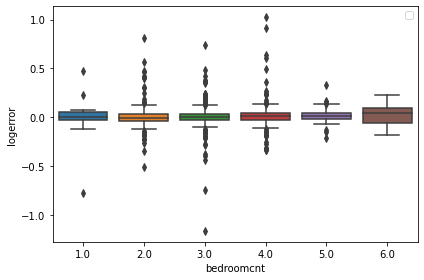

In [41]:
train_drop = train[['fips', 'bedroomcnt']].sample(1000)
target = train["logerror"]
for col in train_drop:
    sns.boxplot(x=train_drop[col], y=target, data=train_drop)
    plt.ylabel('logerror')
    plt.xlabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()

<AxesSubplot:xlabel='yearbuilt', ylabel='taxvaluedollarcnt'>

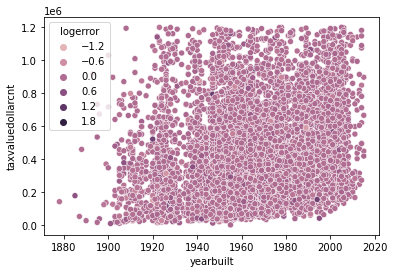

In [42]:
sns.scatterplot(x="yearbuilt", y="taxvaluedollarcnt", hue ="logerror", data=train.sample(10000))


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

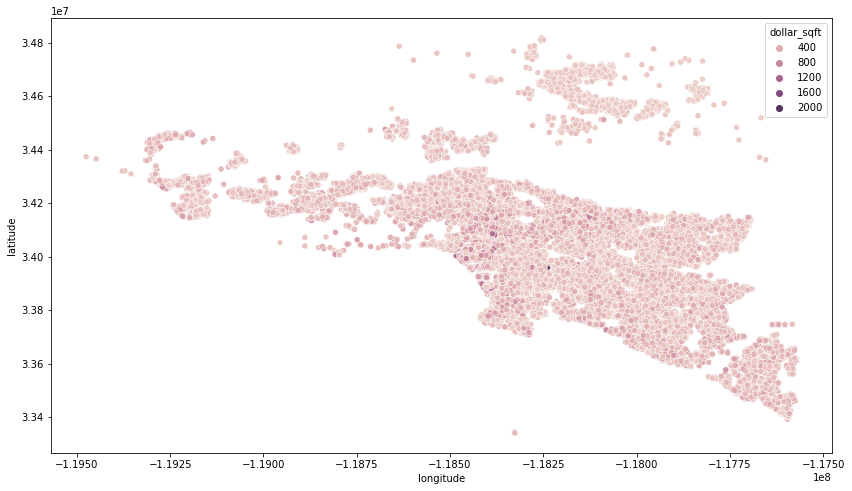

In [50]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='longitude', y='latitude', hue=df.dollar_sqft, data=df)

In [49]:
df["dollar_sqft"]= df.taxvaluedollarcnt/df.calculatedfinishedsquarefeet
df.dollar_sqft

0        330.090968
1        316.723549
2        454.366854
3         61.087121
4        261.074612
            ...    
52437    275.755054
52438     41.690447
52439     48.009690
52440    296.254257
52441    246.984762
Name: dollar_sqft, Length: 46838, dtype: float64